In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import convolve
#from scipy.misc import imshow
from PIL import Image
from skimage import io

# Image path

In [2]:
img_path = "./dataset/mypic.jpg"

# Convolution Function

In [3]:
def m_conv2(img, kernel):
    
    #print(img.shape)
    h,w = img.shape[0],img.shape[1]
    #print(new_img.shape)
    
    #################################################################################
    stride = 1
    new_i = 0
    fil_h = kernel.shape[0]
    fil_w = kernel.shape[1]
    new_img = np.zeros((h-fil_h+1,w-fil_w+1))
    #################################################################################
    
    for i in range(h - fil_h+1):
        for j in range(w - fil_w+1):
            im_region = img[i:(i + fil_h), j:(j + fil_w)]
            r = np.multiply(im_region,kernel).sum()
            new_img[i][j] = int(r/fil_h*fil_w)
    #print(new_img.shape)
    return new_img
    #return (im_in*kernel)


# Load image in grayscale 

In [4]:
def toGrayscale(img_path):
    img = io.imread(img_path, as_gray=True)
    img = np.asarray(img)
    plt.imshow(img,cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    return img

(3, 3)
(960, 960)


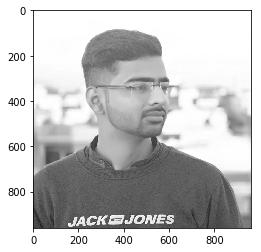

In [5]:
img = toGrayscale(img_path)
kernel = np.array([[0,-2,0],[0,-1,0],[0,0,0]])#emboss
print(kernel.shape)
print(img.shape)



# im2 = convolve(im, kernel)
# print(im2.shape)
# im2 = m_conv2(im, kernel)
#im3 = np.array(np.clip(im2, 0, 255), dtype=np.uint8) #Apply color clipping

In [6]:
def gauss2D(shape=(3,3),sigma=1):
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

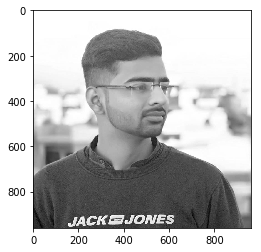

In [7]:
plt.imshow(img,cmap=plt.get_cmap('gray'))

In [8]:
def flipKernel(im):
    return(np.flip(im))
#flipKernel(im)

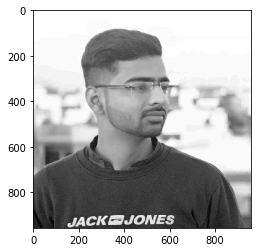

In [9]:
kernel = np.random.randint(5, size=(5, 5))
res_5x5 = m_conv2(img,flipKernel(kernel))
plt.imshow(res_5x5,cmap=plt.get_cmap('gray'))

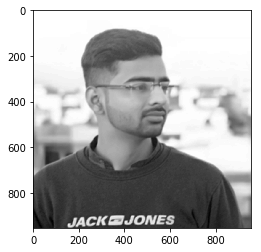

In [10]:
kernel = np.random.randint(5, size=(7, 7))
res_7x7 = m_conv2(img,flipKernel(kernel))
plt.imshow(res_7x7,cmap=plt.get_cmap('gray'))

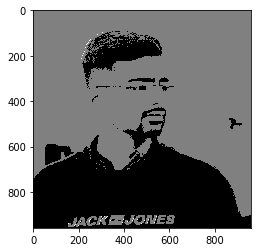

In [11]:
kernel = np.random.normal(0, 1, (3, 3))
res_normal = m_conv2(img,flipKernel(kernel))
plt.imshow(res_normal,cmap=plt.get_cmap('gray'))

In [12]:
def paddingCalculate(O,F,S,W): #O : OutputSize , F : Filter , S : Stride , W : InputSize
    return ((O-1)*S + F - W)/2

In [13]:
def changePadValueSemantically(img,pad,rf,rl,cf,cl):
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    h,w = img.shape[0],img.shape[1]
    #print(img.shape)
    img[0:pad,:-pad]  = rf.mean()
    img[h-pad:,pad:] = rl.mean()
    img[pad:,0:pad] = cf.mean()
    img[:-pad,w-pad:] = cl.mean()
    return img
#     a[0,:-1] = a[0,:-1].mean()
#     a[1:,0] = a[1:,0].mean()
#     a[3,1:] = a[3,1:].mean()
#     a[:-1,-1] = a[:-1,-1].mean()

In [14]:
def pad_withRandom(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    


In [15]:
# img = toGrayscale(img_path)
# im = np.asarray(img)
# W = im.shape[0]
# F = 3
# S = 1
# O = W
# pad = paddingCalculate(O,F,S,W)
# pad = int(pad)

# #print(im)
# # Pad with values
# im = np.pad(im, pad, pad_withRandom)
# #print(im.shape)

# plt.imshow(im,cmap=plt.get_cmap('gray'))

# h,w = im.shape[0],im.shape[1]
# rf,rl,cf,cl = im[0],im[h-1],im[:,0],im[:,w-1]

# # Padding with nearest pixel mean (last pixel mean)
# im2 = changePadValueSemantically(im,pad,rf,rl,cf,cl)

# plt.imshow(im2,cmap=plt.get_cmap('gray'))

In [16]:
def paddingCall(img_path,F):
    img = toGrayscale(img_path)
    im = np.asarray(img)
    W = im.shape[0]
    F = F
    S = 1
    O = W
    pad = paddingCalculate(O,F,S,W)
    pad = int(pad)


    # Pad with values
    im = np.pad(im, pad, pad_withRandom)

    #plt.imshow(im,cmap=plt.get_cmap('gray'))

    h,w = im.shape[0],im.shape[1]
    rf,rl,cf,cl = im[0],im[h-1],im[:,0],im[:,w-1]

    # Padding with nearest pixel mean (last pixel mean)
    im2 = changePadValueSemantically(im,pad,rf,rl,cf,cl)

    plt.imshow(im2,cmap=plt.get_cmap('gray'))
    return im2

In [17]:
#mu, sigma = 0, 1 # mean and standard deviation
#kernel = np.random.(mu, sigma, (5,5))
def kernelConvolve(img,f_size):
    kernel = np.random.randint(15, size=(f_size, f_size))#gauss2D(shape=(3,3),sigma=sigma)
    kernel = kernel/10
    #print("im2 shape",im2.shape)
    res = m_conv2(img,flipKernel(kernel))
    #print(res_3x3)
    plt.imshow(res,cmap=plt.get_cmap('gray'))


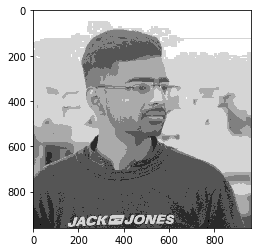

In [18]:
res3x3 = kernelConvolve(paddingCall(img_path,3),3)

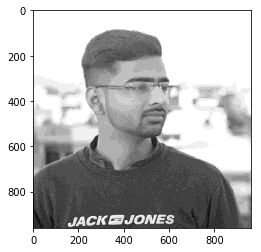

In [19]:
res_5x5 = kernelConvolve(paddingCall(img_path,5),5)

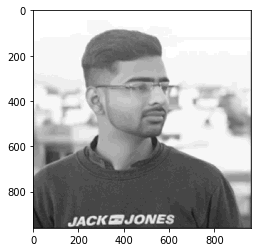

In [20]:
res_7x7 = kernelConvolve(paddingCall(img_path,7),7)

In [21]:
# def kernel5x5(img,size):
#     kernel = np.random.randint(15, size=(size, size))#gauss2D(shape=(3,3),sigma=sigma)
#     #print("im2 shape",im2.shape)
#     res_5x5 = m_conv2(img,flipKernel(kernel))
#     #print(res_3x3)
#     plt.imshow(res_5x5,cmap=plt.get_cmap('gray'))


In [22]:
# def kernel7x7(img,F_size):
#     kernel = np.random.randint(15, size=(F_size, F_size))#gauss2D(shape=(3,3),sigma=sigma)
#     #print("im2 shape",im2.shape)
#     res7x7 = m_conv2(img,flipKernel(kernel))
#     #print(res_3x3)
#     plt.imshow(res_7x7,cmap=plt.get_cmap('gray'))
# res_7x7 = kernelConvolve(paddingCall(img_path,7),7)